# Supervised Learning_R4_Project2_Thera Bank

# Campaign for selling personal loans

### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

#from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report


## Problem Statement :
## Build a model that will help the bank to identify potential customers who have higher probability of purchasing the loan.

## About the Data:

   __Campaign for selling personal loans.__

    This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

    The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

    The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Load Data and read the data as a data frame

In [2]:
tb_df = pd.read_csv("Bank_Personal_Loan_Modelling-1.csv")

### Shape of the data

In [3]:
tb_df.shape

(5000, 14)

### Data type of each attribute

In [4]:
tb_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Check that data is read correctly using head, tail and sample

In [5]:
tb_df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
tb_df.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [7]:
tb_df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2696,2697,63,37,78,91711,4,1.7,3,0,0,0,0,1,0
4135,4136,48,23,168,95929,2,2.8,1,308,0,0,0,1,0
2602,2603,52,26,161,93108,4,4.3,1,0,1,0,1,1,1
900,901,30,4,51,94709,4,0.2,1,172,0,0,0,0,1
396,397,50,24,29,93023,4,0.1,1,0,0,0,0,0,0


### Info on column name, count of records, not-null/null, datatype, count of datatypes and memory usage of columns

In [8]:
tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Input variables

In [9]:
print(tb_df.drop('Personal Loan', axis=1).dtypes)

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


#### Description of The Input Variables
- __ID__         Customer ID
- __Age__	     Customer's age in number of years completed
- __Experience__ Number of years of professional work experience
- __Income__	 Annual income of the customer(in thoudand dollars)
- __ZIPCode__	 Home Address ZIP code of the customer
- __Family__	 Family size of the customer
- __CCAvg__	     Avg. spending on credit cards per month(in thoudand dollars)
- __Education__ Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- __Mortgage__	Value of house mortgage if any(in thoudand dollars)
- __Securities Account__	Does the customer have a securities account with the bank?
- __CD Account__	        Does the customer have a certificate of deposit (CD) account with the bank?
- __Online__	            Does the customer use internet banking facilities?
- __CreditCard__	        Does the customer use a credit card issued by UniversalBank?

### Target variable

In [10]:
print("Personal Loan : values are {}, dtype is {}".format(tb_df['Personal Loan'].unique(),
                                                          tb_df['Personal Loan'].dtype))

Personal Loan : values are [0 1], dtype is int64


#### Description of The Target Variables
- __Personal Loan__	        Did this customer accept the personal loan offered in the last campaign?

### Null Values

In [11]:
tb_df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
print("\nThere are no Null/Missing values in the dataset\n")


There are no Null/Missing values in the dataset



### Negative values

In [13]:
(tb_df < 0).sum()

ID                     0
Age                    0
Experience            52
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [14]:
tb_df[tb_df['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


#### Replace neagtive values in Experience column with 0 as work experience cannot be negative

In [15]:
tb_df['Experience'].where(tb_df['Experience'] >0,other=0, inplace=True)

In [16]:
(tb_df < 0).sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Duplicated data

In [17]:
tb_df.duplicated().sum()

0

In [18]:
print("\nThere are no duplicate records in the dataset\n")


There are no duplicate records in the dataset



### Dropping the ID column

> The ID column has no relationship with any of the other feature columns.
> It is a continuous series of numbers and does not tell anything about the sample taken.
> So, this column can be dropped.

In [19]:
tb_df.drop('ID', axis=1, inplace=True)

In [20]:
#check to see that the ID column is dropped

tb_df.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

### Dropping the ZIP Code column

> The ZIP Code column is not a feature of importance for building the model.
> It is a categorical column which is descrete numerical and will not be useful unless an address, state,city or county column is present .
> So, this column can be dropped.

In [21]:
tb_df.drop('ZIP Code', axis=1, inplace=True)

In [22]:
#check to see that the ZIP code column is dropped

tb_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

## Exploratory Data Analysis (EDA)

### Feature Selection

In [23]:
#Using Forward, Backward and Mixed Selection, we can identify what the important features are.


### numerical columns

- There are 4 numerical features.
- 'ZIP Code', though numerical is not quantitative as measures of central tendancy and dispersion do not apply on this.
- However, 'ZIP Code' can be a valid quantitative measure for certain calculations like Euclidean distance in KNN and has a feature importance.

In [24]:
num_columns = ['Age','Income', 'CCAvg', 'Mortgage']

### categorical columns

- 'Personal Loan' is the Target variable and is binary with 0 and 1 as the two categories.
- 'Securities Account','CD Account','Online' and 'CreditCard' are all binary categorical columns.

In [25]:
cat_columns = ['Experience','Family', 'Education', 'Personal Loan', 'Securities Account',
               'CD Account', 'Online', 'CreditCard']

### 5 point summary of numerical attributes

In [26]:
tb_df[num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


### Observations:
- The mean and standard deviation are approximately equal in Age column.
- The mimimum, 25% and Median are all 0 in Mortgage column, which indicate most customers do not have mortgage of house.
- The minimum value is zero in CCAvg column and also all values lie betwee 0 and 10.

### Outliers analysis of numerical columns

In [27]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):    
    q1 = tb_df[col].quantile(0.25)
    q3 = tb_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [28]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in num_columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(tb_df.loc[(tb_df[col] < lower_limit) | (tb_df[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(tb_df.loc[(tb_df[col] < lower_limit) | (tb_df[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : Age
 Q1 = 35.0 
 Q3 = 55.0
 IQR = 20.0
 Lower limit = 5.0
 Upper limit = 85.0

OUTLIERS ARE NOT PRESENT in Age column


Column name : Income
 Q1 = 39.0 
 Q3 = 98.0
 IQR = 59.0
 Lower limit = -49.5
 Upper limit = 186.5

96 OUTLIERS ARE PRESENT in Income column.
Outlier datapoints in Income column are:
[193 194 190 188 195 191 200 205 204 195 192 194 202 195 200 193 192 195
 191 188 191 190 190 194 195 192 190 195 191 192 195 192 193 190 198 201
 200 188 192 190 194 201 191 191 188 203 189 193 190 204 198 201 201 191
 191 195 190 188 190 195 195 205 198 190 191 191 195 194 194 202 191 199
 203 188 224 188 189 191 190 195 193 204 194 195 191 188 195 188 193 199
 188 199 194 201 195 218]

Column name : CCAvg
 Q1 = 0.7 
 Q3 = 2.5
 IQR = 1.8
 Lower limit = -2.0
 Upper limit = 5.2

324 OUTLIERS ARE PRESENT in CCAvg column.
Outlier datapoints in CCAvg column are:
[ 8.9   8.1   5.7   8.    5.7   5.6   7.2   7.4   7.5   6.5   6.5   7.8
  7.9   6.8   7.4   7.5   7.9   6.2   5.5   6

## Visualizing Outliers in dataset using boxplot


		boxplot to check the presence of outliers in numeric columns



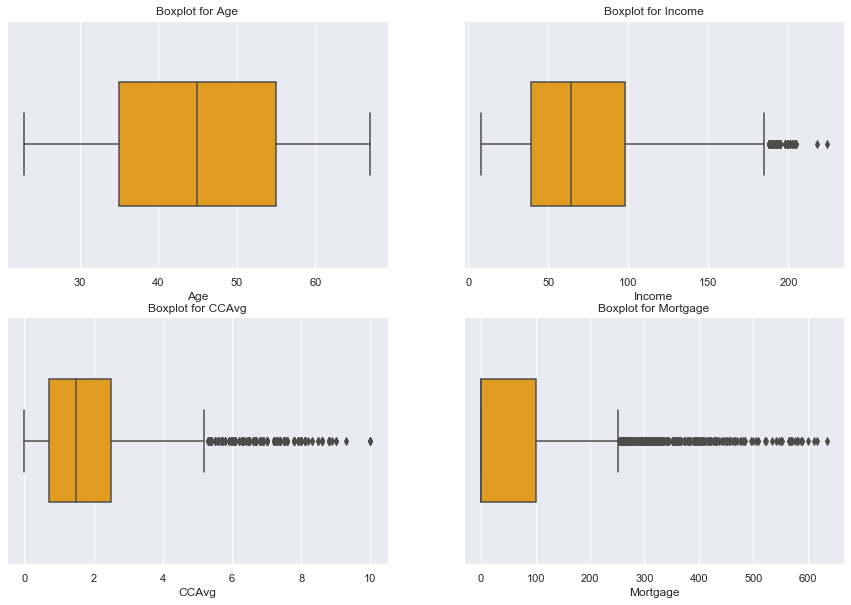

In [29]:
#Visualizing Outliers in dataset using boxplot

print('\n\t\tboxplot to check the presence of outliers in numeric columns')
print('\t\t==============================================================\n')
#num_columns = ['Age','Income', 'CCAvg', 'Mortgage']
fig, ax = plt.subplots(2,2,figsize=(15, 10))
for col,subplot in zip(num_columns,ax.flatten()) :
    sns.boxplot(x=tb_df[[col]], width=0.5, color='orange', ax=subplot)
    subplot.set_title('Boxplot for {}'.format(col))
    subplot.set_xlabel(col)    
plt.show()


### Observations on outlier analysis of numerical columns:
1. Maximum number of Outliers (324) are present in CCAvg column.
2. Mortgage and Income have 291 and 96 outliers respectfully.
3. Min, 25% and Median overlap and are 0 for Mortgage column.
4. The distribution for Age column looks to be approximately normal and CCAvg and Income look to be right skewed.

## Variance in numerical columns

In [30]:
tb_df[num_columns].var()

Age           131.404166
Income       2119.104235
CCAvg           3.054312
Mortgage    10345.697538
dtype: float64

## Visualizing variance of numerical columns through lineplot

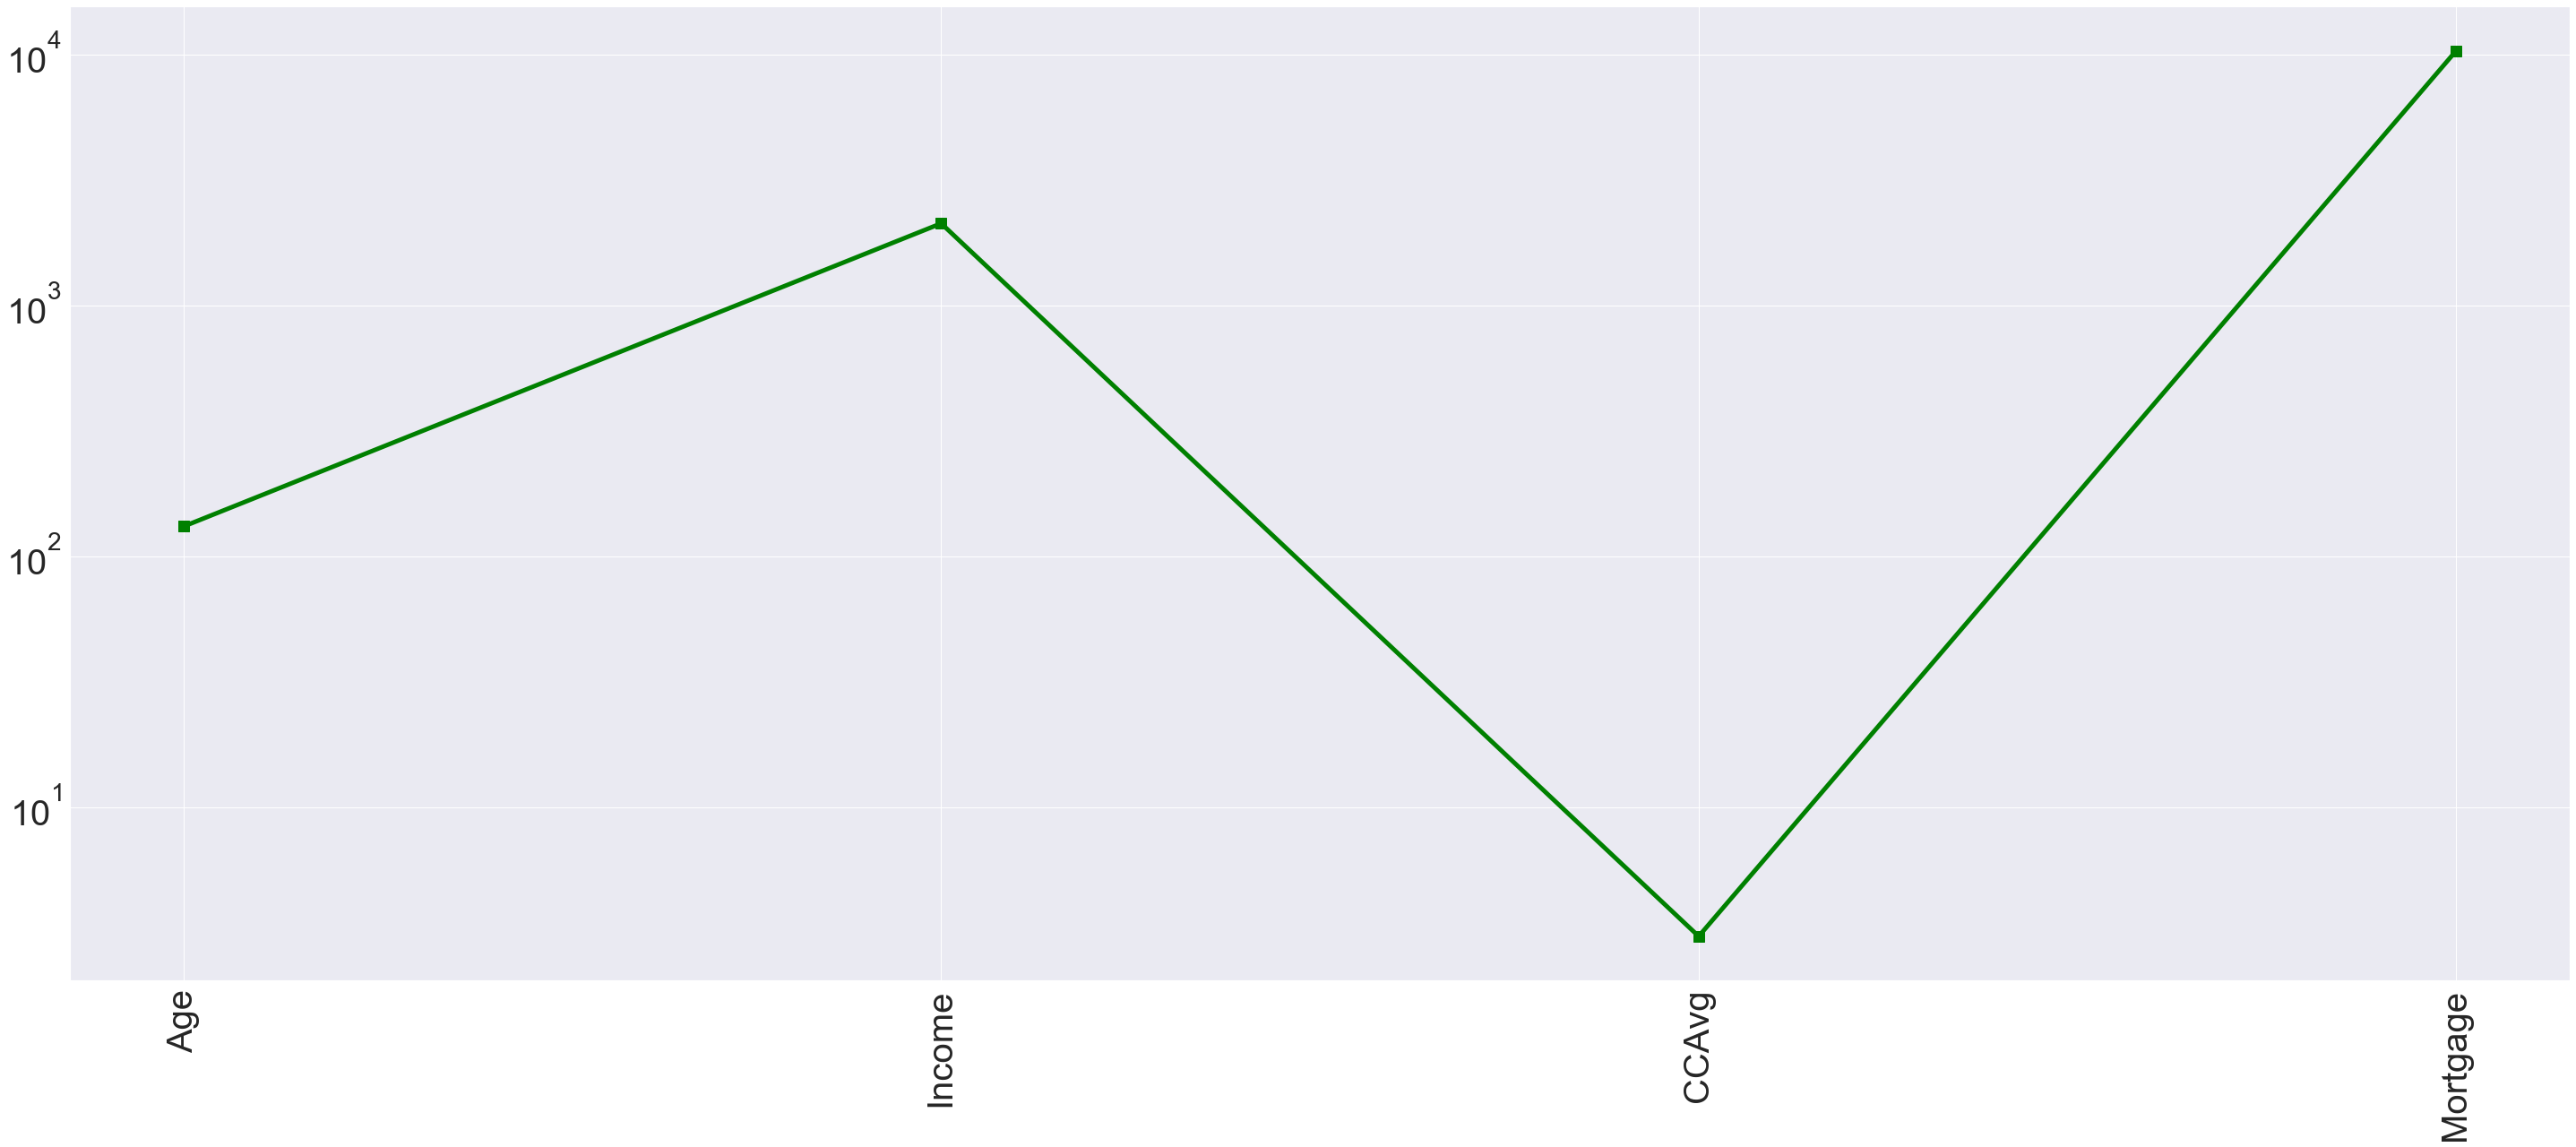

In [31]:
plt.figure(figsize=(50,20))
plt.xticks(rotation = 90, fontsize=40)
plt.yticks(fontsize=40)
plt.plot(tb_df[num_columns].var(), color='green', marker='s',linewidth=5, markersize=12)
plt.yscale('log')
plt.show()

### Observations on variance of numerical columns
1. The above line plot shows the variance values for all the numerical feature columns.
2. Variance in all the numerical columns vary exponentially.
3. Variance in CCAvg column is very less with a value of 3.
4. Variance in Mortgage column is very high and in scale of 10^4.
5. Variance in Age column is in scale of 10^2 and in Income column is in scale of 10^3.
6. A high variance indicates that the data points are more spread out around the mean, ie the spread is more and a low variance indicates that the data points are more close to the mean, ie the spread is less.
7. With all variances varying exponentially, it is suggested to scale the column data using any standadization method for model building.

# Univariate Analysis

## Visualizing Distribution of numerical columns through distplots

In [32]:
#tb_df[num_columns].hist(bins=20, figsize=(15,9), layout=(2,2),color = 'red',alpha=0.6)
#plt.show()

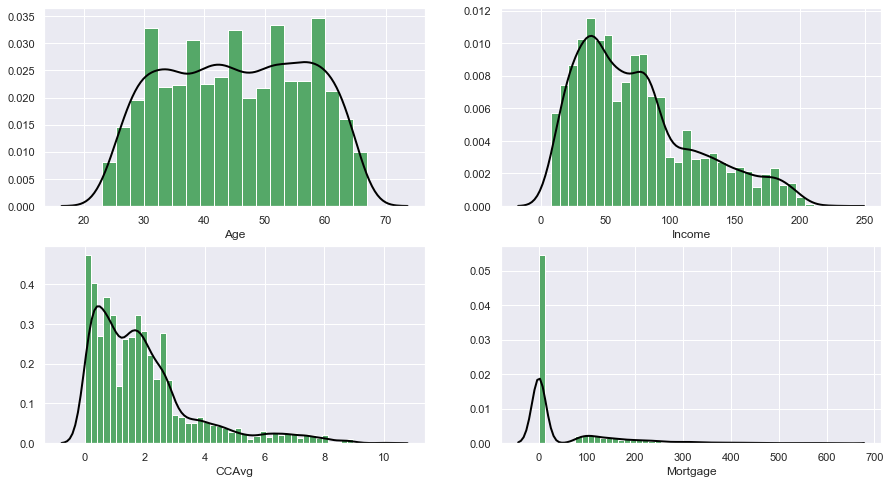

In [33]:
fig, ax = plt.subplots(2,2,figsize=(15, 8))
for col,subplot in zip(num_columns,ax.flatten()) :
    ax =sns.distplot(tb_df[col], ax=subplot, hist_kws={'color':'g','alpha':1}, kde_kws={'color':'black', 'lw':2})

### Observations on univariate analysis of numerical columns:
 1. The distributions for the columns Income and CCAvg are approximately right skewed and have long tails.
 2. Mortgage column does not show a proper distribution and is uneven.The distribution has a long tail.
 3. Most of the datapoints in Morgage column are close to 0.
 4. Distribution for the Age column is approximately normal.

## Visualizing value counts of categorical columns through countplot

In [34]:
val_counts_df = pd.DataFrame(columns=('colname', 'min_count_value', 'min_count', 'min_count%',
                                      'max_count_value', 'max_count', 'max_count%'))

for i, col in zip(range(0,len(cat_columns)),cat_columns):
    val_counts_df.loc[i,'colname'] = col
    val_counts_df.loc[i,'min_count_value'] = tb_df[col].value_counts().idxmin()
    val_counts_df.loc[i,'min_count'] = tb_df[col].value_counts().min()
    val_counts_df.loc[i,'min_count%'] = tb_df[col].value_counts().min()/tb_df.shape[0] * 100
    val_counts_df.loc[i,'max_count_value'] = tb_df[col].value_counts().idxmax()
    val_counts_df.loc[i,'max_count'] = tb_df[col].value_counts().max()
    val_counts_df.loc[i,'max_count%'] = tb_df[col].value_counts().max()/tb_df.shape[0] * 100
    #print("colname: {}  val for min count: {} min count: {} val for max count: {} max count: {}".format(col, tb_df[col].value_counts().idxmin(), tb_df[col].value_counts().min(), tb_df[col].value_counts().idxmax(), tb_df[col].value_counts().max()))
val_counts_df

,colname,min_count_value,min_count,min_count%,max_count_value,max_count,max_count%
0,Experience,43,3,0.06,32,154,3.08
1,Family,3,1010,20.2,1,1472,29.44
2,Education,2,1403,28.06,1,2096,41.92
3,Personal Loan,1,480,9.6,0,4520,90.4
4,Securities Account,1,522,10.44,0,4478,89.56
5,CD Account,1,302,6.04,0,4698,93.96
6,Online,0,2016,40.32,1,2984,59.68
7,CreditCard,1,1470,29.4,0,3530,70.6


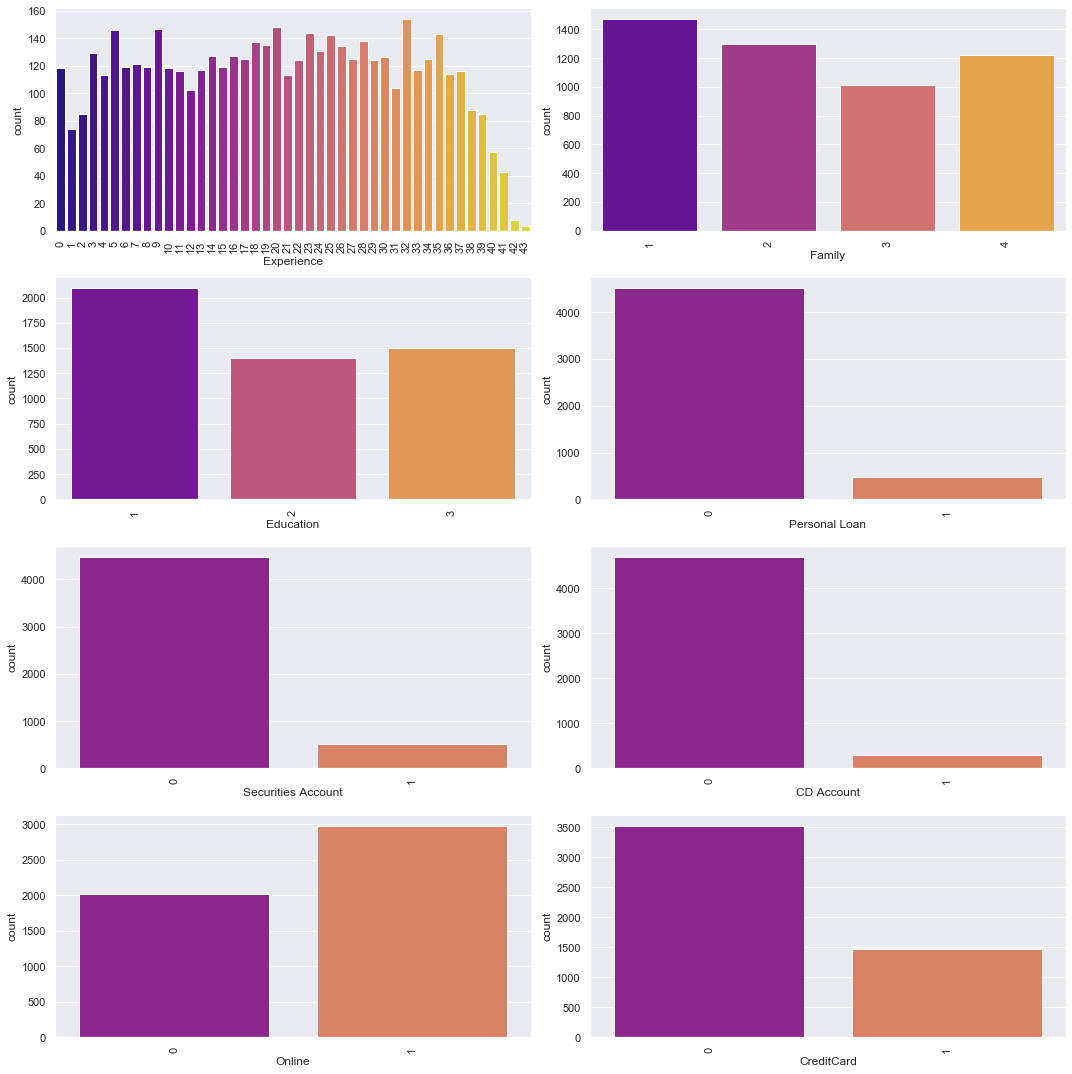

In [35]:
fig, ax = plt.subplots(4, 2, figsize=(15, 15))
for col, subplot in zip(cat_columns, ax.flatten()) :
    sns.countplot(tb_df[col], ax=subplot,palette = 'plasma')
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.tight_layout()

### Observations on univariate analysis of categorical columns:
- Maximum number of customers, which is only 4% are having an experience of 32 years and minimum number of customers, which is 0.06% are having experience of 43 years,and the experience of customers is not skewed.
- A maximum of 29.4% customers are singles (family=1) and a minimum of 20% have a family of 3.So, number of customers is not skewed based on family size.
- Maximum of 42% of customers are Undergraduates(Education=1), and a minimum of 28% are Graduates(Education=2).Remaining 30% of customers are Professionals.So, the number of customers is not skewed to one single level of education.
- 90% of customers do not have a Securities Account(class 0) and only 10% of customers have a Securities Account(class 1).
- 94% of customers do not have a CD, ie, certificate of deposit with the bank(class 0) and only 6% of customers have a certificate of deposit(class 1).
- 70% of customers do not have a Credit Card(class 0) and 30% of customers have a Credit Card(class 1).
- 40% of customers do not use internet banking facilities(class 0) and 60% of customers use internet banking(class 1).

### Target column distribution

In [36]:
# The Target column is 'Personal loan'.
# Value counts and distribution of Target column

In [37]:
tb_df.groupby(by='Personal Loan').count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


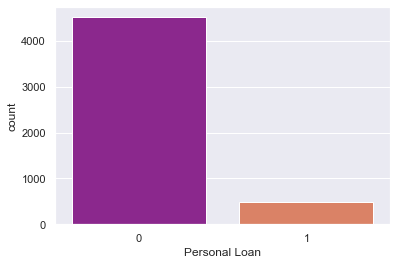

In [38]:
sns.countplot(tb_df['Personal Loan'], palette = 'plasma')
plt.show()

### Observations on value counts of Target column:
1. __A status of '1' refers to a 'Customer Accepting the Personal Loan'.__
2. Among the 5000 customers, only 480 customers (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.
3. __A status of '0' refers to a 'Customer Not Accepting the Personal Loan'.__
4. Among the 5000 customers, 4520 customers (= 90.4%) did not accept the personal loan that was offered to them in the earlier campaign.

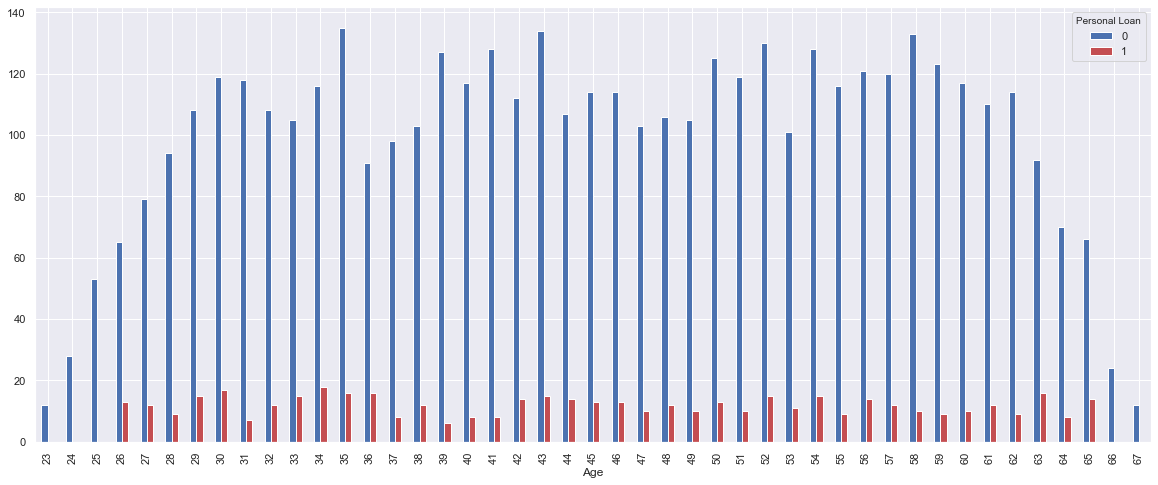

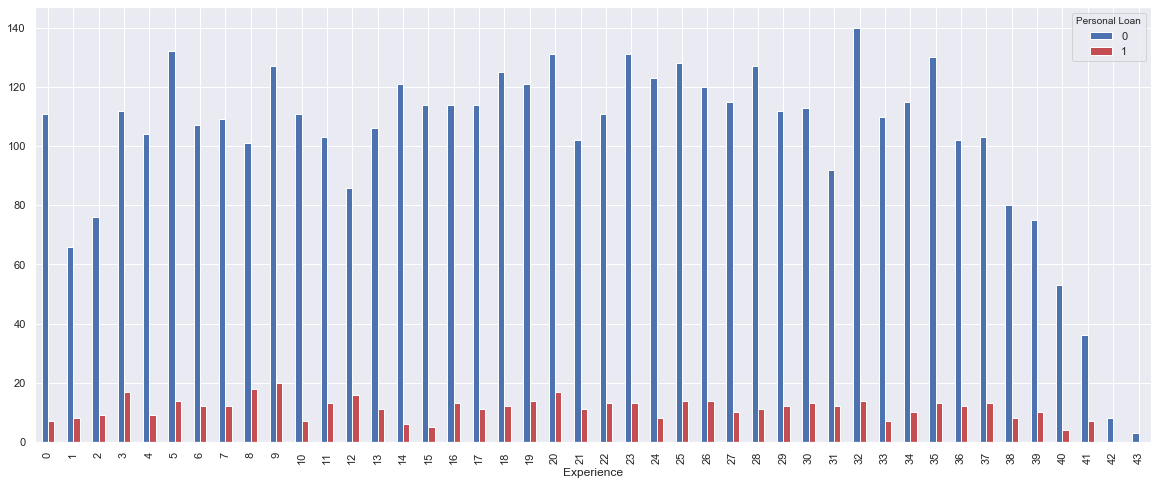

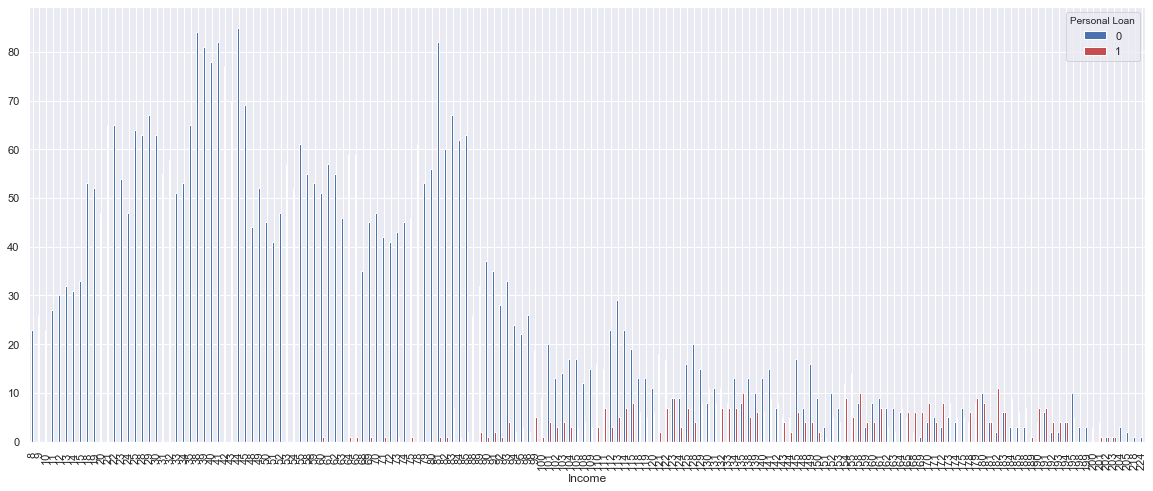

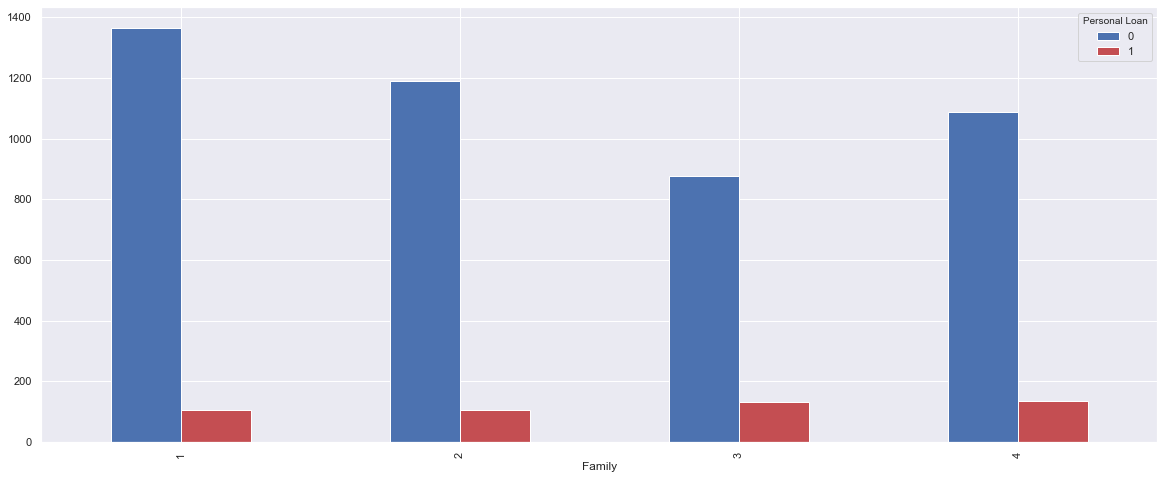

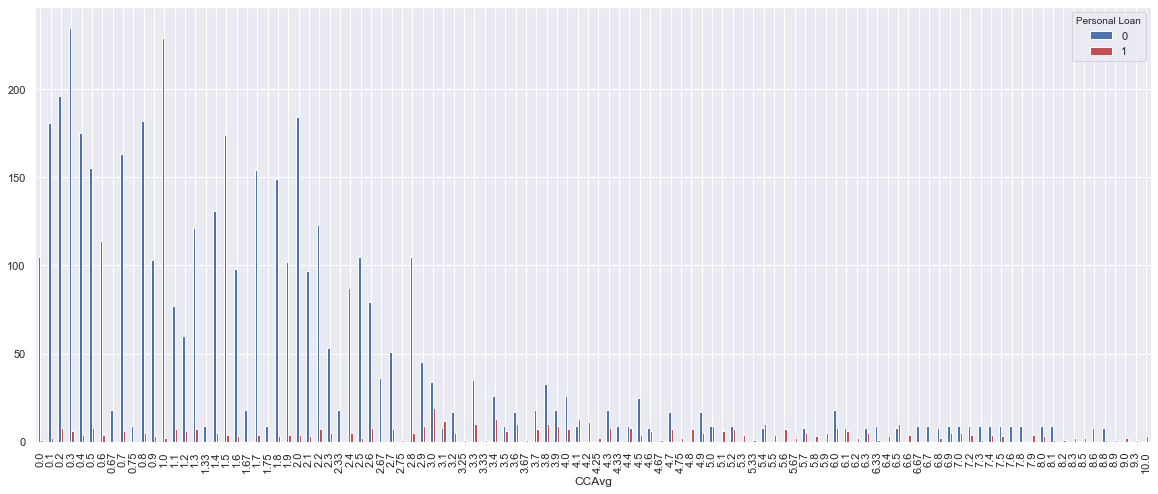

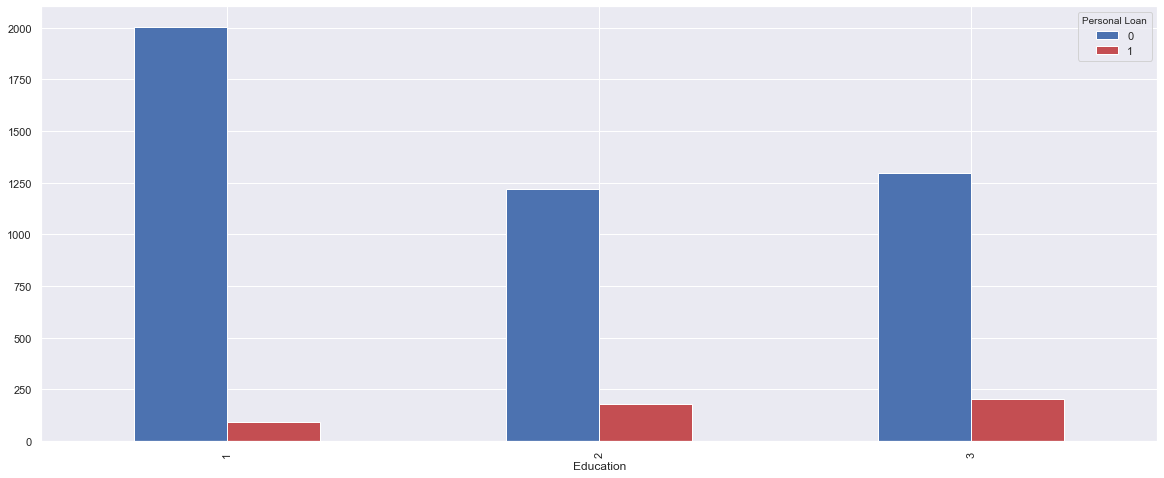

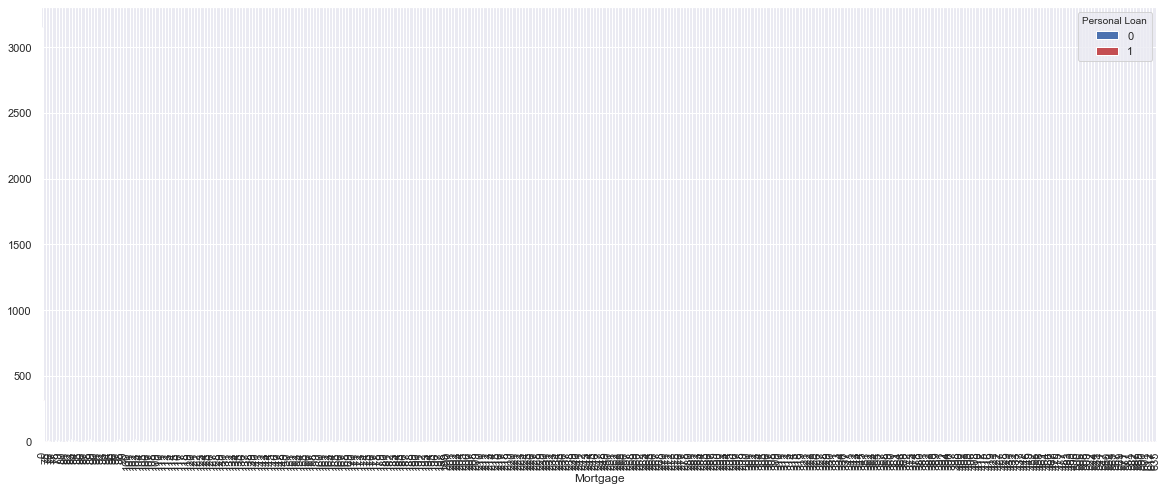

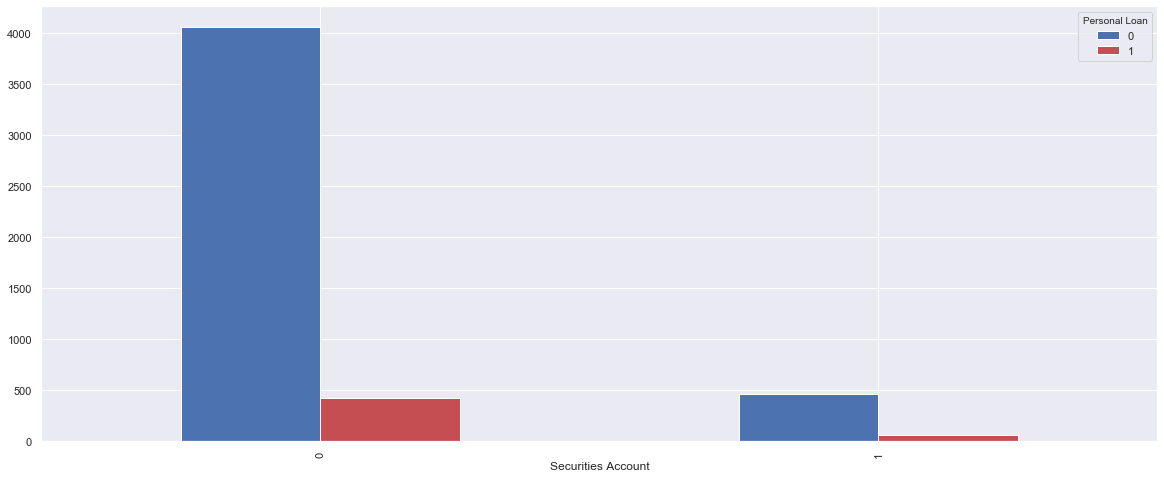

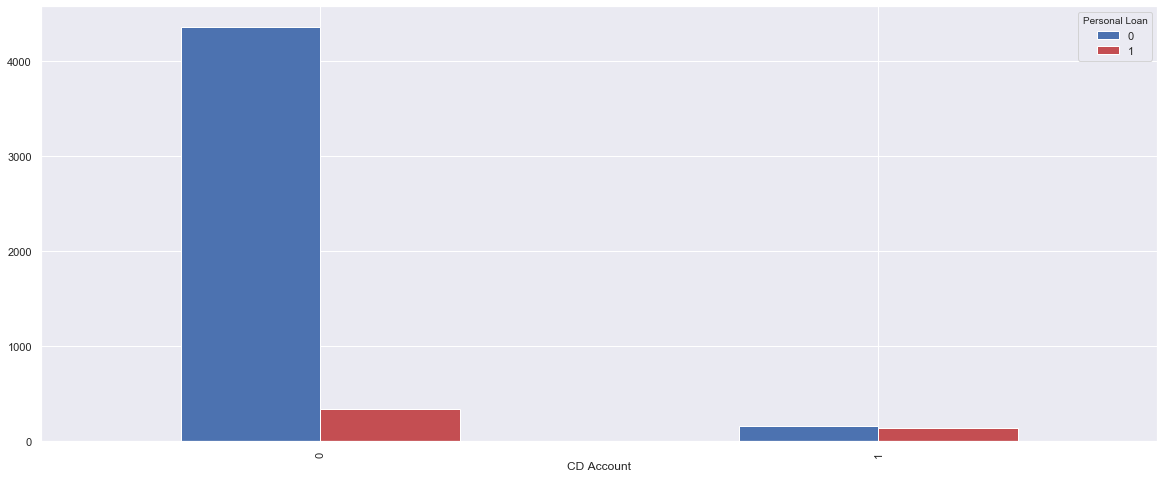

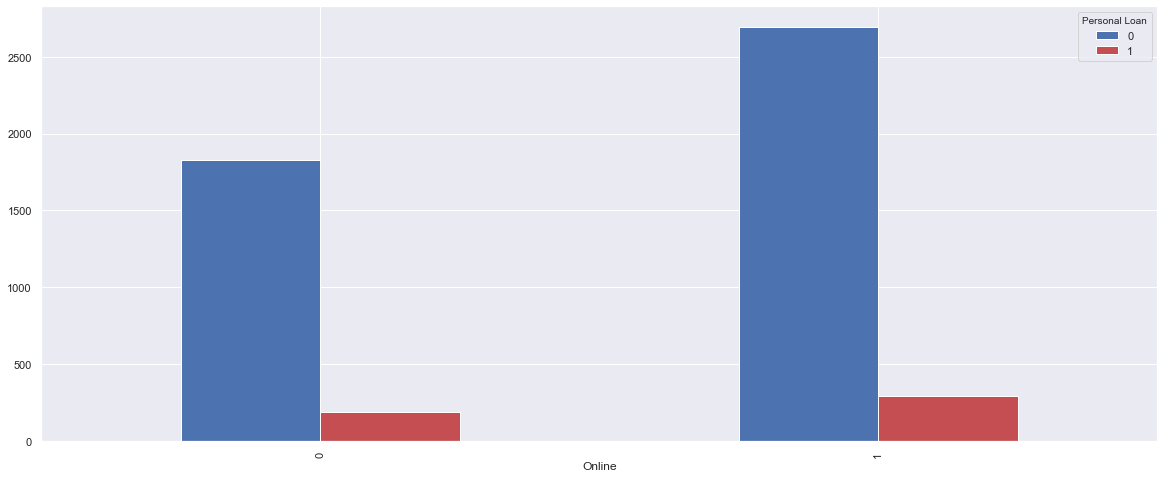

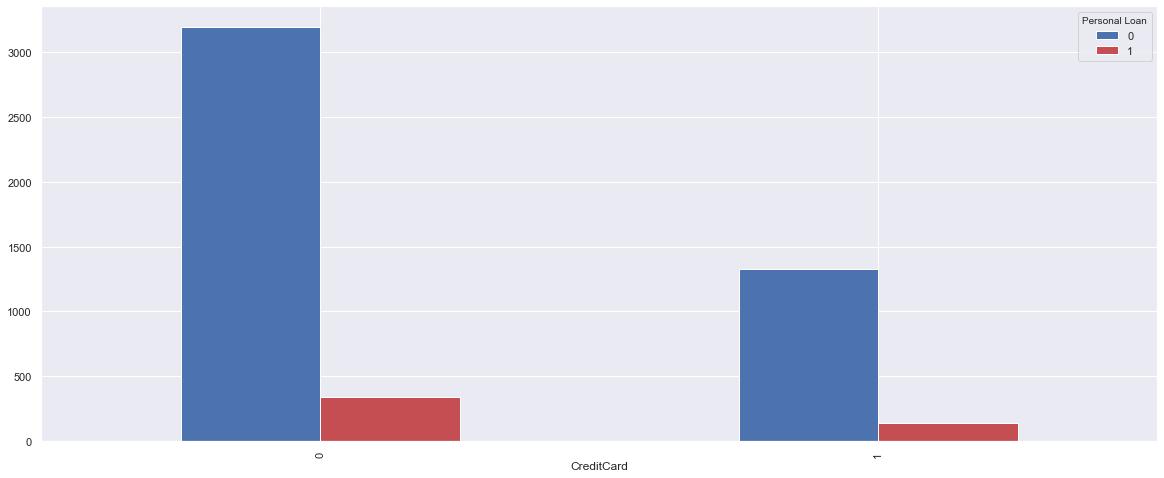

In [39]:
for col in tb_df.drop('Personal Loan', axis=1).columns :
    pd.crosstab(tb_df[col], tb_df['Personal Loan']).plot(kind='bar',color=('b', 'r'), figsize=(20,8))

### Observations on distribution of Target column:
- Customers with age less than 26 years and more than 65 years have not accepted the personal loan in the previous campaign.
- Customers with experience more than 41 years upto 43 years have not accepted the personal loan in the previous campaign.
- None of the customers having an income less than 60K  have accepted a personal loan.
- Customers falling in the income group between 90K to 195K are seen accepting the personal loan. Also, number of customers in this income group are less.
- Acceptence of Personal loan is very less for customers falling in any category of family size from 1 to 4 and non-acceptance is more in case of singles(family=1)
- Acceptence of Personal loan is very less for customers falling in any category of eduation from 1 to 3, and non-acceptance is more in the case of undergraduates(Education=1).
- Irrespective of average credit card spending , none of customers have accepted a Personal loan based on this feature.
- Most of the customers who do not have a Securities Account or a certificate of deposit account with the bank have also not accepted a personal loan in the previous camapign.
- Most of the customers who do not have a credit card have also not accepted a personal loan in the previous camapign.
- Most of the customers who use internet banking facilities have not accepted a  personal loan.

> We can give a suggestion that, for the current campaign to be more successful and get more loan business the bank can target customers who are aged between 26 years and 65 years, are in the income group of 90K to 195k and have an experience between 32 to 35 years. 

# Bivariate Analysis

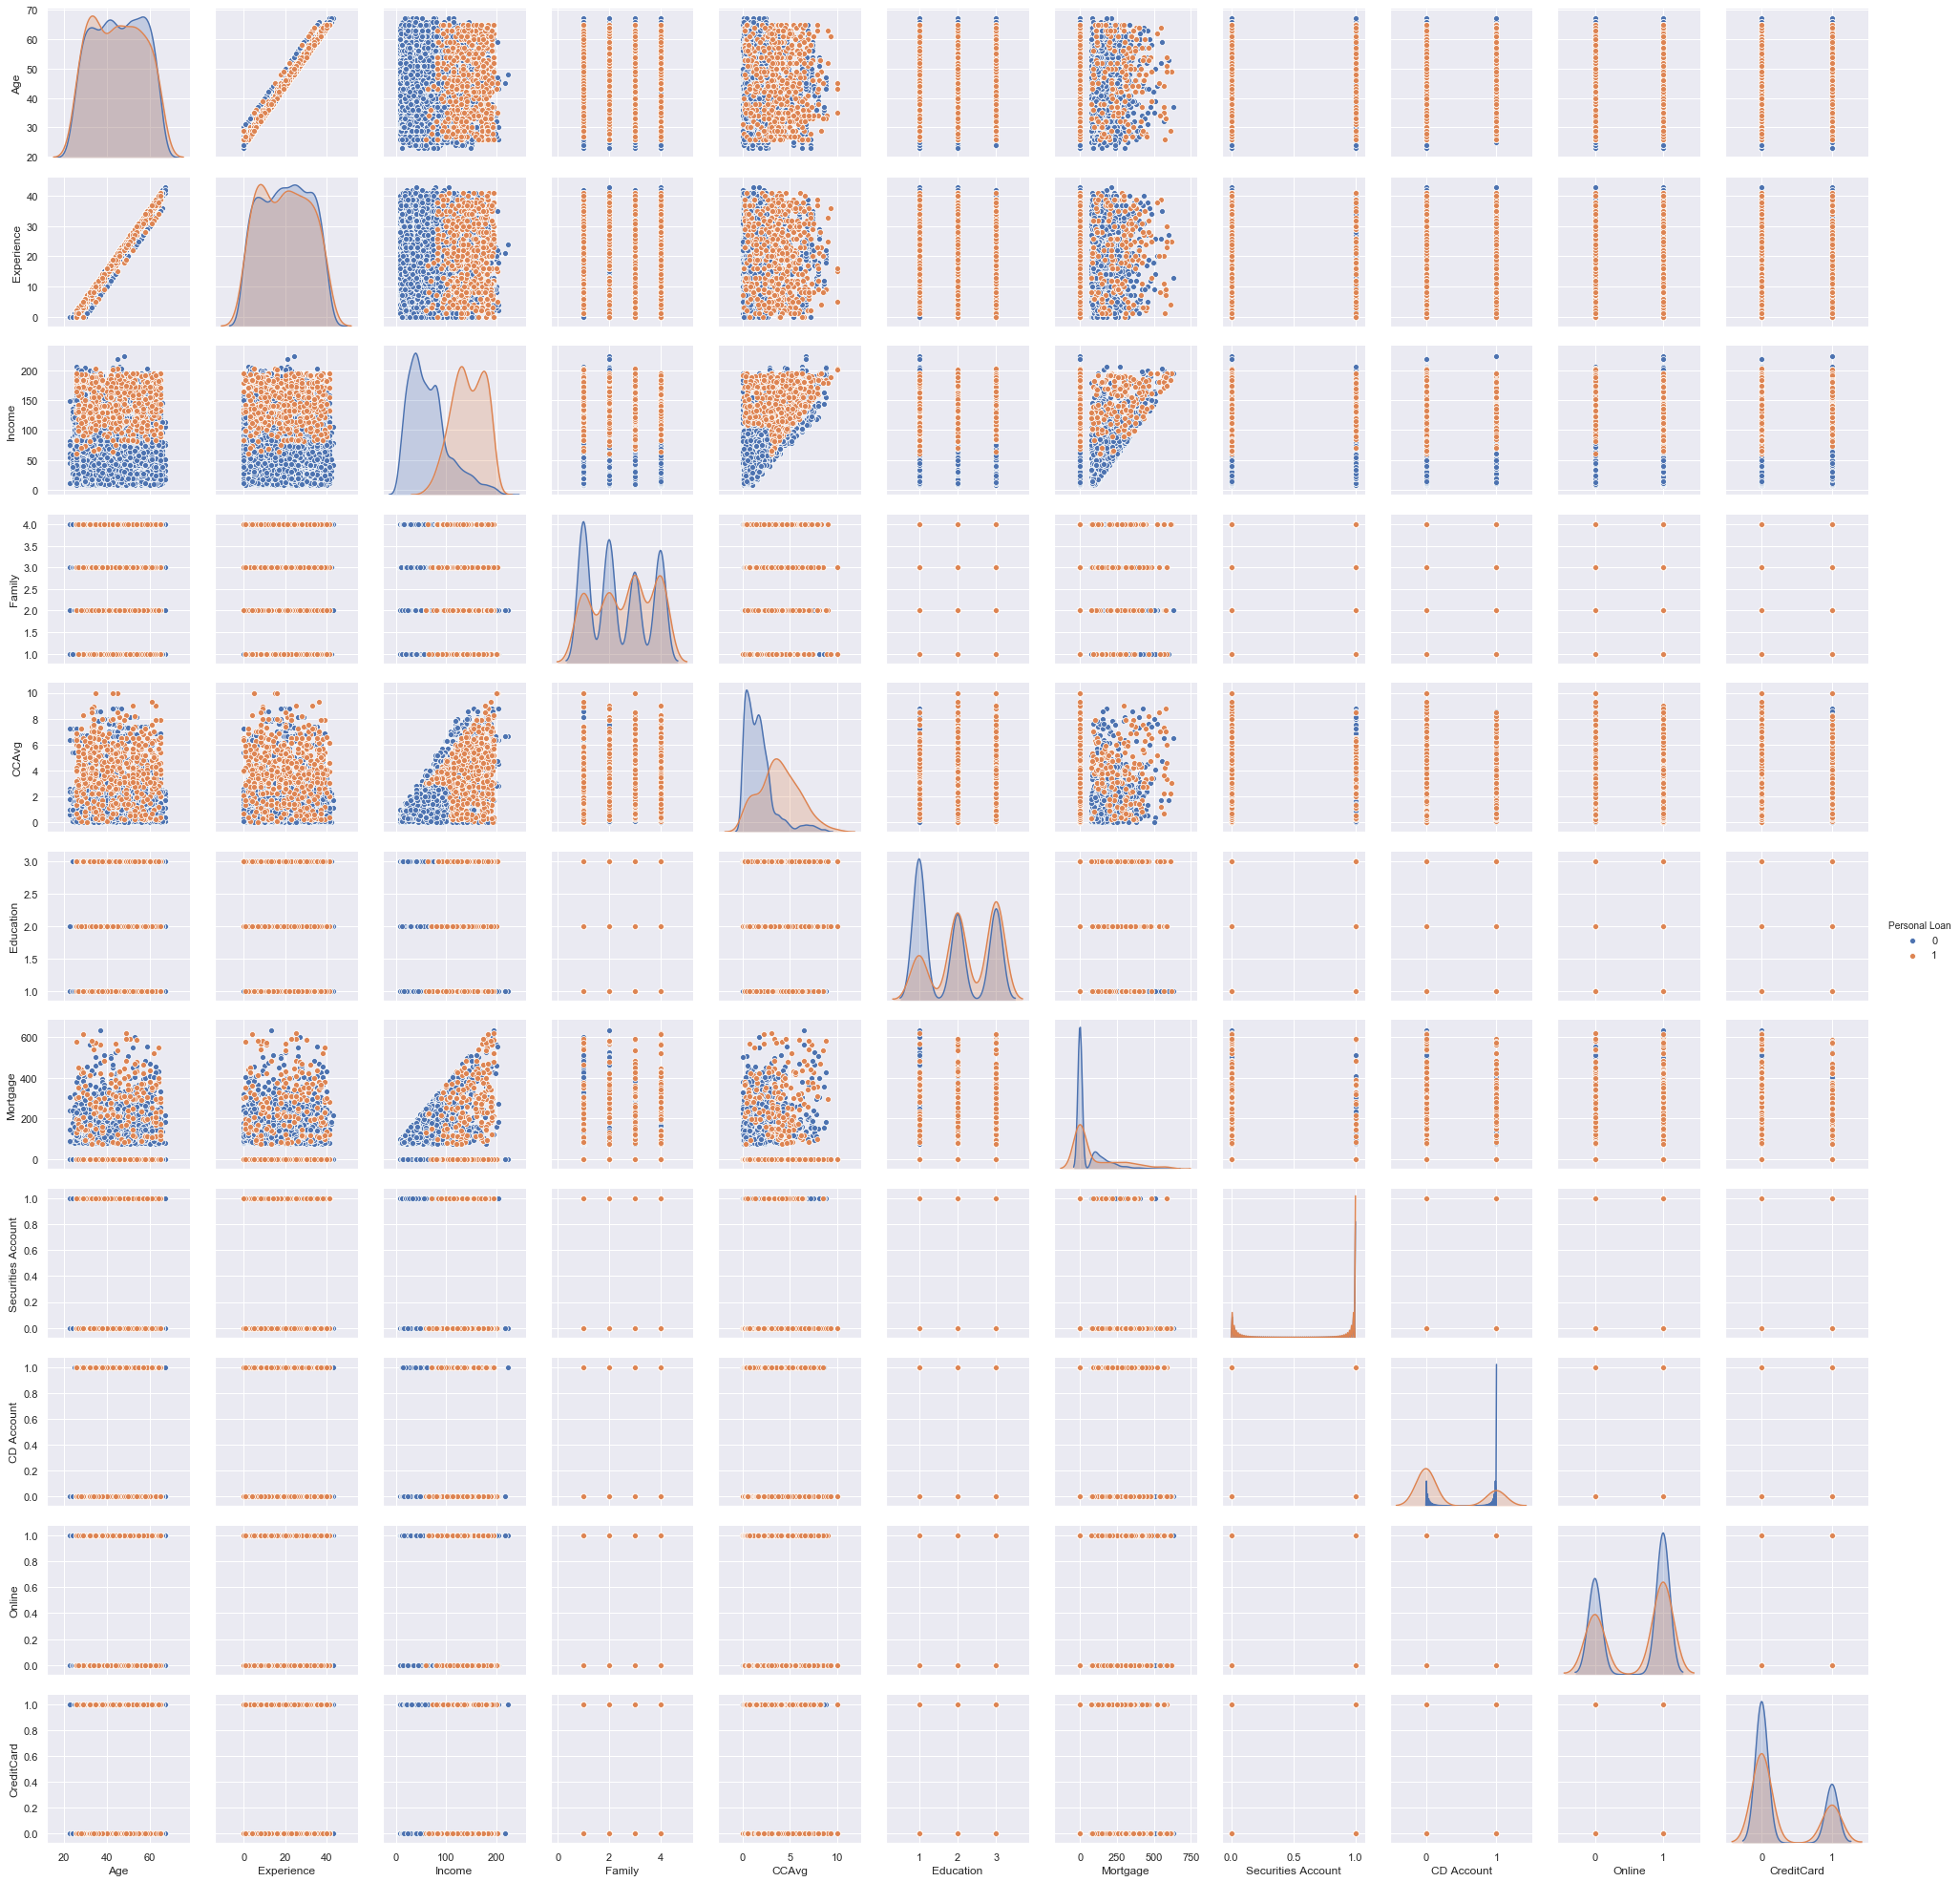

In [40]:
sns.pairplot(vars=tb_df.drop('Personal Loan', axis=1).columns,hue='Personal Loan',data=tb_df)
plt.show()

In [41]:
tb_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

### Observations on bivariate analysis using pairplot:
- Age and Experience are the only columns which show a strong linear relationship with each other.
- Except for a slight linear relationship between Income and CCAvg no other columns show a good relationship among them.
- The KDE plots for Age and Experience are completely overlapping based on target column classes, which means target column is very difficult to classify based on these two columns.

## Correlation between numerical columns

In [42]:
#corr = pd_df.corr()
#Dropping satus column while finding the correlatipn as it is the target variable.
corr = tb_df[num_columns].corr()
corr.style.background_gradient(cmap='YlGnBu')

,Age,Income,CCAvg,Mortgage
Age,1,-0.0552686,-0.0520122,-0.0125386
Income,-0.0552686,1,0.645984,0.206806
CCAvg,-0.0520122,0.645984,1,0.109905
Mortgage,-0.0125386,0.206806,0.109905,1


## Visualizing Correlation between numerical columns through Heat map

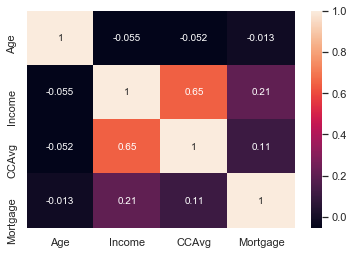

In [43]:
sns.heatmap(corr, annot=True)
plt.show()

### Observations on Correlation between numerical columns:
- Income and CCAvg columns are the only fetaures which show a strong correlation of 0.65
- Age has a weak negative correlation with all other columns.
- Mortgage column has less positive correlation with Income and CCAvg.

# Implementing KNN, Logistic and Naïve Bayes Classification models

### Create the X(Feature-set) and Y(Target-set) sets for your Data.

In [44]:
X = tb_df.drop('Personal Loan',axis=1)
y = tb_df['Personal Loan']

In [45]:
print('Shape of Feture-set : ', X.shape)
print('Shape of Target-set : ', y.shape)

Shape of Feture-set :  (5000, 11)
Shape of Target-set :  (5000,)


### Split the data as train set and test set with a ratio of 70:30.

In [46]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.30, random_state=7)

In [47]:
print("Training Set Shape:\nFeatures : {0}  Target : {1}\n".format(X_train.shape, y_train.shape))
print("Test Set Shape:\nFeatures : {0}  Target : {1}".format(X_test.shape, y_test.shape))

Training Set Shape:
Features : (3500, 11)  Target : (3500,)

Test Set Shape:
Features : (1500, 11)  Target : (1500,)


### Standardize the training dataset and test dataset

In [48]:
#Standardization using Z-score method of scipy.stats module

from scipy.stats import zscore

In [49]:
#Training set scaled with zscores

X_trainZ = zscore(X_train)

In [50]:
#Test set scaled with zscores

X_testZ = zscore(X_test)

In [51]:
print(X_trainZ.mean(), X_trainZ.std())

2.154697776623161e-17 1.0


In [52]:
print(X_testZ.mean(), X_testZ.std())

-2.3038809917069915e-17 0.9999999999999999


In [53]:
#Standardization using Standard Scaler class of sklearn.preprocessing module

from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler().fit(X_train)

In [55]:
scaler.mean_

array([4.54914286e+01, 2.02814286e+01, 7.40565714e+01, 2.38714286e+00,
       1.91738286e+00, 1.86885714e+00, 5.82334286e+01, 1.06000000e-01,
       5.91428571e-02, 5.93714286e-01, 2.91714286e-01])

In [56]:
scaler.var_

array([1.30711641e+02, 1.29941655e+02, 2.15509566e+03, 1.32526327e+00,
       3.02222035e+00, 7.07658694e-01, 1.09629961e+04, 9.47640000e-02,
       5.56449796e-02, 2.41217633e-01, 2.06617061e-01])

In [57]:
#Training set transformed to fit Standard Scaler

X_trainS = scaler.transform(X_train)

In [58]:
#Test set transformed to fit Standard Scaler

X_testS = scaler.transform(X_test)

In [59]:
print(X_trainS.mean(), X_trainS.std())

2.154697776623161e-17 1.0


In [60]:
print(X_testS.mean(), X_testS.std())

-0.0013600020962460414 0.9922954417279288


In [61]:
#DataFrame to store model Performance metrics of all the classification methods
compare_metrics_df = pd.DataFrame(index=('K-NearestNeighbors', 'Logistic Regression', 'Gaussian Naive Bayes'), 
                                  columns=('Trainingset Accuracy', 'Testset Accuracy', 'Precision Score', 
                                           'Recall Score', 'F1 Score', 'ROC_AUC Score'))

In [62]:
compare_metrics_df.index.name = 'Classifier Name'

## Implementing K Nearest Neighbors (KNN) Classification model

### Build KNN Classification model using train Dataset and predict the class on test dataset.

In [63]:
#Implementing KNN Classifier for default k value 5

knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [64]:
#Fit the model to the training set

knn_clf.fit(X_trainS, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [65]:
# Predict classes using the built model

yhat_knn = knn_clf.predict(X_testS)

In [66]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['K-NearestNeighbors','Trainingset Accuracy'] = round(knn_clf.score(X_trainS, y_train), 2)
knn_clf.score(X_trainS, y_train)

1.0

In [67]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['K-NearestNeighbors','Testset Accuracy'] = round(knn_clf.score(X_testS, y_test), 2)
knn_clf.score(X_testS, y_test)

0.9613333333333334

In [68]:
k_range = 100
mean_train_acc_knn = np.zeros(k_range)
mean_test_acc_knn = np.zeros(k_range)

for n in range(1,k_range+1) :
    KNN = KNeighborsClassifier(n_neighbors=n, weights='distance')
    KNN.fit(X_trainS, y_train)
    mean_train_acc_knn[n-1] = KNN.score(X_trainS, y_train)
    mean_test_acc_knn[n-1] = KNN.score(X_testS, y_test)

In [69]:
print('\nBest test accuracy is {0} for a K value of {1}'.format(mean_test_acc_knn.max(), mean_test_acc_knn.argmax()+1))
print('\nThe train accuracy for best test accuracy is {}'.format(mean_train_acc_knn[mean_test_acc_knn.argmax()+1]))
print('\nThe Best K-value for the classification is K = {}'.format(mean_test_acc_knn.argmax()+1))


Best test accuracy is 0.9653333333333334 for a K value of 4

The train accuracy for best test accuracy is 1.0

The Best K-value for the classification is K = 4


#### The model accuracy score with k value of 5 is almost the same with the best k valueof 4.So, we can retain the k value to be 5 and proceed with calculating the metrics using KNN Classifier

### Model Performance using KNN Classifier

#### Calculating Model Performance Metrics.

##### confusion matrix

In [70]:
confusion_matrix_knn = confusion_matrix(y_test, yhat_knn)
confusion_matrix(y_test, yhat_knn)

array([[1356,    6],
       [  52,   86]], dtype=int64)

##### accuracy-score

In [71]:
accuracy_score(y_test, yhat_knn)

0.9613333333333334

##### Precision score

In [72]:
compare_metrics_df.loc['K-NearestNeighbors','Precision Score'] = round(precision_score(y_test, yhat_knn), 2)
precision_score(y_test, yhat_knn)

0.9347826086956522

###### Recall score

In [73]:
compare_metrics_df.loc['K-NearestNeighbors','Recall Score'] = round(recall_score(y_test, yhat_knn), 2)
recall_score(y_test, yhat_knn)

0.6231884057971014

###### F1-Score

In [74]:
compare_metrics_df.loc['K-NearestNeighbors','F1 Score'] = round(f1_score(y_test, yhat_knn), 2)
f1_score(y_test, yhat_knn)

0.7478260869565218

###### ROC_AUC-Score

In [75]:
compare_metrics_df.loc['K-NearestNeighbors','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_knn), 2)
roc_auc_score(y_test, yhat_knn)

0.8093915597267446

##### Classification report

In [76]:
print(classification_report(y_test, yhat_knn))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1362
           1       0.93      0.62      0.75       138

    accuracy                           0.96      1500
   macro avg       0.95      0.81      0.86      1500
weighted avg       0.96      0.96      0.96      1500



## Implementing Logistic Regression Classification model

### Build Logistic Regression Classification Model using train Dataset and predict the class on test dataset.

In [77]:
#Implementing Logistic Regression Classifier

lgr_clf = LogisticRegression(solver='lbfgs', random_state=7)

In [78]:
#Fit the model to the training set

lgr_clf.fit(X_trainS, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
# Predict classes using the built model

yhat_lgr = lgr_clf.predict(X_testS)

In [80]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['Logistic Regression','Trainingset Accuracy'] = round(lgr_clf.score(X_trainS, y_train), 2)
lgr_clf.score(X_trainS, y_train)

0.9525714285714286

In [81]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['Logistic Regression','Testset Accuracy'] = round(lgr_clf.score(X_testS, y_test), 2)
lgr_clf.score(X_testS, y_test)

0.9546666666666667

### Model Performance using Logistic Regression Classifier

#### Calculating Model Performance Metrics.

##### confusion matrix

In [82]:
confusion_matrix_lgr = confusion_matrix(y_test, yhat_lgr)
confusion_matrix(y_test, yhat_lgr)

array([[1343,   19],
       [  49,   89]], dtype=int64)

##### accuracy-score

In [83]:
accuracy_score(y_test, yhat_lgr)

0.9546666666666667

##### Precision score

In [84]:
compare_metrics_df.loc['Logistic Regression','Precision Score'] = round(precision_score(y_test, yhat_lgr), 2)
precision_score(y_test, yhat_lgr)

0.8240740740740741

###### Recall score

In [85]:
compare_metrics_df.loc['Logistic Regression','Recall Score'] = round(recall_score(y_test, yhat_lgr), 2)
recall_score(y_test, yhat_lgr)

0.644927536231884

###### F1-Score

In [86]:
compare_metrics_df.loc['Logistic Regression','F1 Score'] = round(f1_score(y_test, yhat_lgr), 2)
f1_score(y_test, yhat_lgr)

0.7235772357723578

###### ROC_AUC-Score

In [87]:
compare_metrics_df.loc['Logistic Regression','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_lgr), 2)
roc_auc_score(y_test, yhat_lgr)

0.8154887314052225

##### Classification report

In [88]:
print(classification_report(y_test, yhat_lgr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1362
           1       0.82      0.64      0.72       138

    accuracy                           0.95      1500
   macro avg       0.89      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



## Implementing Naïve Bayes Classification model

### Build Gaussian Naïve Bayes Classification Model using train Dataset and predict the class on test dataset.

In [89]:
#Implementing Logistic Regression Classifier

gnb_clf = GaussianNB()

In [90]:
#Fit the model to the training set

gnb_clf.fit(X_trainS, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [91]:
# Predict classes using the built model

yhat_gnb = gnb_clf.predict(X_testS)

In [92]:
# Model accuracy score using score() function on Training data set

compare_metrics_df.loc['Gaussian Naive Bayes','Trainingset Accuracy'] = round(gnb_clf.score(X_trainS, y_train), 2)
gnb_clf.score(X_trainS, y_train)

0.8822857142857143

In [93]:
# Model accuracy score using score() function on Test data set

compare_metrics_df.loc['Gaussian Naive Bayes','Testset Accuracy'] = round(gnb_clf.score(X_testS, y_test), 2)
gnb_clf.score(X_testS, y_test)

0.8793333333333333

### Model Performance using Naive Bayes Classifier

### Calculating Model Performance Metrics.

##### confusion matrix

In [94]:
confusion_matrix_gnb = confusion_matrix(y_test, yhat_gnb)
confusion_matrix(y_test, yhat_gnb)

array([[1237,  125],
       [  56,   82]], dtype=int64)

##### accuracy-score

In [95]:
accuracy_score(y_test, yhat_gnb)

0.8793333333333333

##### Precision score

In [96]:
compare_metrics_df.loc['Gaussian Naive Bayes','Precision Score'] = round(precision_score(y_test, yhat_gnb), 2)
precision_score(y_test, yhat_gnb)

0.3961352657004831

###### Recall score

In [97]:
compare_metrics_df.loc['Gaussian Naive Bayes','Recall Score'] = round(recall_score(y_test, yhat_gnb), 2)
recall_score(y_test, yhat_gnb)

0.5942028985507246

###### F1-Score

In [98]:
compare_metrics_df.loc['Gaussian Naive Bayes','F1 Score'] = round(f1_score(y_test, yhat_gnb), 2)
f1_score(y_test, yhat_gnb)

0.47536231884057967

###### ROC_AUC-Score

In [99]:
compare_metrics_df.loc['Gaussian Naive Bayes','ROC_AUC Score'] = round(roc_auc_score(y_test, yhat_gnb), 2)
roc_auc_score(y_test, yhat_gnb)

0.7512130498627339

##### Classification report

In [100]:
print(classification_report(y_test, yhat_gnb))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1362
           1       0.40      0.59      0.48       138

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.70      1500
weighted avg       0.91      0.88      0.89      1500



## Comparision of K-NN, Logistic Regression and Naïve Bayes Classification Models

In [101]:
compare_metrics_df

,Trainingset Accuracy,Testset Accuracy,Precision Score,Recall Score,F1 Score,ROC_AUC Score
Classifier Name,,,,,,
K-NearestNeighbors,1,0.96,0.93,0.62,0.75,0.81
Logistic Regression,0.95,0.95,0.82,0.64,0.72,0.82
Gaussian Naive Bayes,0.88,0.88,0.4,0.59,0.48,0.75


In [102]:
print("Confusion Matrix of all the 3 models")
print("====================================")
print("\nK-Nearest Neighbors:\n")
print(confusion_matrix_knn)
print("\nLogistic Regression:\n")
print(confusion_matrix_lgr)
print("\nGaussian Naive Bayes:\n")
print(confusion_matrix_gnb)

Confusion Matrix of all the 3 models

K-Nearest Neighbors:

[[1356    6]
 [  52   86]]

Logistic Regression:

[[1343   19]
 [  49   89]]

Gaussian Naive Bayes:

[[1237  125]
 [  56   82]]


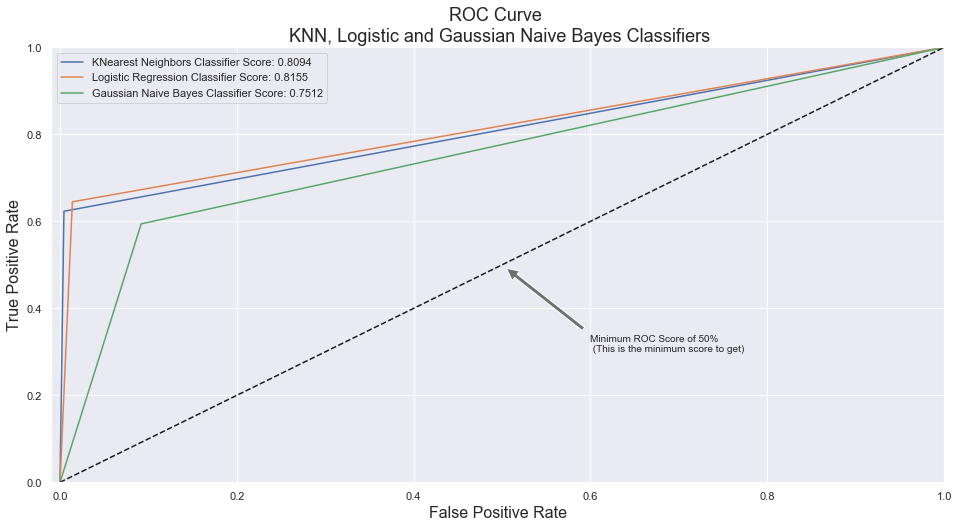

In [103]:
#ROC_AUC Curve for the three models

knn_fpr, knn_tpr, knn_thresold = roc_curve(y_test, yhat_knn)
lgr_fpr, lgr_tpr, lgr_thresold = roc_curve(y_test, yhat_lgr)
gnb_fpr, gnb_tpr, gnb_thresold = roc_curve(y_test, yhat_gnb)

def graph_roc_curve(knn_fpr, knn_tpr, lgr_fpr, lgr_tpr, gnb_fpr, gnb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n KNN, Logistic and Gaussian Naive Bayes Classifiers', fontsize=18)
    plt.plot(knn_fpr, knn_tpr, label='KNearest Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yhat_knn)))
    plt.plot(lgr_fpr, lgr_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yhat_lgr)))
    plt.plot(gnb_fpr, gnb_tpr, label='Gaussian Naive Bayes Classifier Score: {:.4f}'.format(roc_auc_score(y_test, yhat_gnb)))
    #plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    #plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve(knn_fpr, knn_tpr, lgr_fpr, lgr_tpr, gnb_fpr, gnb_tpr)
plt.show()

### Interpretation of metrics from accuracy, precision, recall, roc_auc and f1 scores
- Naive Bayes classifier is not giving a good accuracy with both training Data set and test dataset.
- The f1 score, Precision and Recall scores are also very less compared to other two model with Naive Bayes.
- __So Naive Bayes Classifier is not a good technique to apply on this dataset, as it does not give a good model.__
- The accuracy scores on both training and test data sets are very good with both KNN and Logistic Regression classification techniques.
- Though, the Recall score with Logistic Regression is slightly better than with KNN, the f1 score and Precision score are much better for KNN than for Logistic Regression.
- The Precision obtained with KNN is the best and miuch better than with the remining two.
- The high accuracy with training dataset is because, both KNN and Logistic regression are learning very well from the training set.
- From the confusion matrix for KNN, Logistic Rrgression and Naive Bayes models, it is evident that, The number of True positives is very high in all three models leading to an overfit
- The KNN and Logistic Regression model are nearly overfit, because the dataset is imbalanced,with 90% of the target classes being '0' and only 10% of the classes being '1'.
- The roc_auc score for KNN is 0.80 and for Logistic Regression it is 0.81, which are almost equal.But, for Naive Bayes model it is less and equal to 0.75.
### __Considering the good f1 score, roc_auc score, Precision and Recall scores, K NearestNeighbors classifier should be the best model to be applied for this dataset.__